In [8]:
import numpy as np
import scipy as sp
import pandas as pd
import os
import pickle
import json
import matplotlib.pyplot as plt

from collections import defaultdict
from pathlib import Path
from scipy import interpolate
from scipy import stats
from sklearn.cross_decomposition import PLSRegression

In [9]:
filename = 'cell_count_int_std_p_value.csv'
df = pd.read_csv(filename)

pos = [f'gfap_positive_Y{i + 1}' for i in range(10)]
neg = [f'gfap_negative_Y{i + 1}' for i in range(10)]
pos_samples = df[pos].values
neg_samples = df[neg].values

In [10]:
X = np.hstack([pos_samples, neg_samples]).T
y = np.array([1] * 10 + [0] * 10)
pslr = PLSRegression(n_components=2)
X_score, y_score = pslr.fit_transform(X, y)

Visualization on the two principle components (LV):

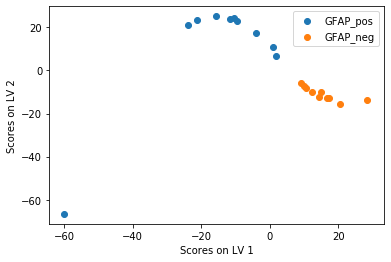

In [11]:
x1 = X_score[y == 1]
x0 = X_score[y == 0]
plt.figure()
plt.scatter(x1[:, 0], x1[:, 1], label='GFAP_pos')
plt.scatter(x0[:, 0], x0[:, 1], label='GFAP_neg')
plt.xlabel('Scores on LV 1')
plt.ylabel('Scores on LV 2')
plt.legend()
plt.show()

Each LV is a linear composition of all the peaks.

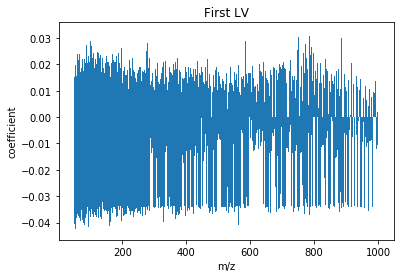

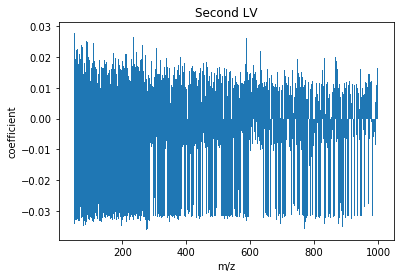

In [12]:
# The first LV
plt.figure()
plt.bar(df['m/z'].values, pslr.x_loadings_[:, 0], width=2)
plt.title('First LV')
plt.xlabel('m/z')
plt.ylabel('coefficient')
plt.show()
plt.figure()
plt.bar(df['m/z'].values, pslr.x_loadings_[:, 1], width=2)
plt.title('Second LV')
plt.xlabel('m/z')
plt.ylabel('coefficient')
plt.show()

In [8]:
loading = np.hstack([df['m/z'].values.reshape([-1, 1]), pslr.x_loadings_])
loading = pd.DataFrame(loading, columns=['m/z', 'loading score on LV1', 'loading score on LV2'])
loading.to_csv('loading_score.csv')